In [1]:
import os
import argparse
import torch
import numpy as np
import torch.backends.cudnn as cudnn

from models.retinaface.config import cfg
from models.retinaface.prior_box import PriorBox
from models.retinaface.py_cpu_nms import py_cpu_nms

import cv2

from models.retinaface.retinaface import RetinaFace
from models.retinaface.box_utils import decode , decode_landm
import time

from PIL import Image

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
trained_model_path = "models/retinaface/weights/Final_Retinaface.pth"
cpu = True
confidence_threshold = 0.05
top_k = 5000
nms_threshold = 0.3
keep_top_k = 750

vis_threshold = 0.6

In [4]:
print(device)

cuda


In [5]:
### check_keys

def check_keys(model, pretrained_state_dict):
    ckpt_keys = set(pretrained_state_dict.keys())
    model_keys = set(model.state_dict().keys())
    used_pretrained_keys = model_keys & ckpt_keys
    unused_pretrained_keys = ckpt_keys - model_keys
    missing_keys = model_keys - ckpt_keys
    print('Missing keys:{}'.format(len(missing_keys)))
    print('Unused checkpoint keys:{}'.format(len(unused_pretrained_keys)))
    print('Used keys:{}'.format(len(used_pretrained_keys)))
    assert len(used_pretrained_keys) > 0, 'load NONE from pretrained checkpoint'
    return True

### remove_prefix
def remove_prefix(state_dict, prefix):
    ''' Old style model is stored with all names of parameters sharing common prefix 'module.' '''
    print('remove prefix \'{}\''.format(prefix))
    f = lambda x: x.split(prefix, 1)[-1] if x.startswith(prefix) else x
    return {f(key): value for key, value in state_dict.items()}


### load_model
def load_model(model, pretrained_path, load_to_cpu):
    print('Loading pretrained model from {}'.format(pretrained_path))
    if load_to_cpu:
        pretrained_dict = torch.load(pretrained_path, map_location=lambda storage, loc: storage)
    else:
        device = torch.cuda.current_device()
        pretrained_dict = torch.load(pretrained_path, map_location=lambda storage, loc: storage.cuda(device))
    if "state_dict" in pretrained_dict.keys():
        pretrained_dict = remove_prefix(pretrained_dict['state_dict'], 'module.')
    else:
        pretrained_dict = remove_prefix(pretrained_dict, 'module.')
    check_keys(model, pretrained_dict)
    model.load_state_dict(pretrained_dict, strict=False)
    return model

In [6]:
torch.set_grad_enabled(False)

#net and model
net = RetinaFace(phase="test")
net = load_model(net , trained_model_path, cpu)
net.eval()
print("Finished loading model!")
cudnn.benchmark = True
device = torch.device("cpu" if cpu else "cuda")
net = net.to(device)

Loading pretrained model from models/retinaface/weights/Final_Retinaface.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:300
Finished loading model!


In [34]:
main_dir = r"standard_dataset/LFW_dataset"

for files in (os.listdir(main_dir)):
    
    file_name = main_dir + '/' + files
    save_image_path = "dataset/Standard Dataset Person" + '/' + files
    os.mkdir(save_image_path)
    for file in (os.listdir(file_name)):
        img_path = file_name + '/' + file
        pointExtract(img_path)

net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0080
net forward time: 0.0120
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0110
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090


net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0110
net forward time: 0.0200
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0120
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0150
net forward time: 0.0130
net forward time: 0.0150
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0120
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0120
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0120
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0080
net forward time: 0.0110
net forward time: 0.0090


net forward time: 0.0140
net forward time: 0.0140
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0140
net forward time: 0.0140
net forward time: 0.0120
net forward time: 0.0080
net forward time: 0.0150
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0085
net forward time: 0.0080
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0130
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0120
net forward time: 0.0130
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0131
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0100


net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0150
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0130
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0080
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0110
net forward time: 0.0095
net forward time: 0.0090
net forward time: 0.0120
net forward time: 0.0120
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0110
net forward time: 0.0110
net forward time: 0.0130
net forward time: 0.0260
net forward time: 0.0120
net forward time: 0.0140
net forward time: 0.0101
net forward time: 0.0120
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100


net forward time: 0.0110
net forward time: 0.0120
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0130
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0110
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0080
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0110
net forward time: 0.0130


net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0120
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0160
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0130
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0130
net forward time: 0.0090
net forward time: 0.0120
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090


net forward time: 0.0080
net forward time: 0.0080
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0080
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0120
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0110
net forward time: 0.0140
net forward time: 0.0150
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0140
net forward time: 0.0110
net forward time: 0.0100


net forward time: 0.0100
net forward time: 0.0120
net forward time: 0.0220
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0120
net forward time: 0.0120
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0120
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0120
net forward time: 0.0100
net forward time: 0.0140
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0150
net forward time: 0.0130
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0140
net forward time: 0.0150
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090


net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0080
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0110
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0095
net forward time: 0.0085
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0130
net forward time: 0.0185
net forward time: 0.0090
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0090
net forward time: 0.0110
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0080
net forward time: 0.0120
net forward time: 0.0100
net forward time: 0.0150
net forward time: 0.0190
net forward time: 0.0100
net forward time: 0.0100
net forward time: 0.0090
net forward time: 0.0130
net forward time: 0.0110
net forward time: 0.0120
net forward time: 0.0130


In [32]:
def pointExtract(path):

    resize = 1
    image_path = path
    save_image = True

    name = image_path.split('/')[-1].split('.')[-2]
    name

    img_raw = cv2.imread(image_path, cv2.IMREAD_COLOR)

    img = np.float32(img_raw)

    im_height, im_width, _ = img.shape
    scale = torch.Tensor([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
    img -= (104, 117, 123)
    img = img.transpose(2, 0, 1)
    img = torch.from_numpy(img).unsqueeze(0)
    img = img.to(device)
    scale = scale.to(device)

    tic = time.time()
    loc, conf, landms = net(img)  # forward pass
    print('net forward time: {:.4f}'.format(time.time() - tic))

    priorbox = PriorBox(cfg, image_size=(im_height, im_width))
    priors = priorbox.forward()
    priors = priors.to(device)
    prior_data = priors.data
    boxes = decode(loc.data.squeeze(0), prior_data, cfg['variance'])
    boxes = boxes * scale / resize
    boxes = boxes.cpu().numpy()
    scores = conf.squeeze(0).data.cpu().numpy()[:, 1]
    landms = decode_landm(landms.data.squeeze(0), prior_data, cfg['variance'])
    scale1 = torch.Tensor([img.shape[3], img.shape[2], img.shape[3], img.shape[2],
                                   img.shape[3], img.shape[2], img.shape[3], img.shape[2],
                                   img.shape[3], img.shape[2]])
    scale1 = scale1.to(device)
    landms = landms * scale1 / resize
    landms = landms.cpu().numpy()

    # ignore low scores
    inds = np.where(scores > confidence_threshold)[0]
    boxes = boxes[inds]
    landms = landms[inds]
    scores = scores[inds]

    # keep top-K before NMS
    order = scores.argsort()[::-1][:top_k]
    boxes = boxes[order]
    landms = landms[order]
    scores = scores[order]

    # do NMS
    dets = np.hstack((boxes, scores[:, np.newaxis])).astype(np.float32, copy=False)
    keep = py_cpu_nms(dets, nms_threshold)
    # keep = nms(dets, args.nms_threshold,force_cpu=args.cpu)
    dets = dets[keep, :]
    landms = landms[keep]

    # keep top-K faster NMS
    dets = dets[:keep_top_k, :]
    landms = landms[:keep_top_k, :]

    dets = np.concatenate((dets, landms), axis=1)

    # show image
    if save_image:
                for b in dets:
                    if b[4] < vis_threshold:
                        continue
                    text = "{:.4f}".format(b[4])
                    b = list(map(int, b))
                    cv2.rectangle(img_raw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
                    cx = b[0]
                    cy = b[1] + 12
                    cv2.putText(img_raw, text, (cx, cy),
                                cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255))

                    # landms
                    cv2.circle(img_raw, (b[5], b[6]), 4, (0, 0, 255), 4)
                    cv2.circle(img_raw, (b[7], b[8]), 4, (0, 255, 255), 4)
                    cv2.circle(img_raw, (b[9], b[10]), 4, (255, 0, 255), 4)
                    cv2.circle(img_raw, (b[11], b[12]), 4, (0, 255, 0), 4)
                    cv2.circle(img_raw, (b[13], b[14]), 4, (255, 0, 0), 4)
                # save image
                name = image_path.split('/')[-1]
                cv2.imwrite("{}/{}.png".format(save_image_path, name), img_raw)
    im = Image.open("{}/{}.png".format(save_image_path, name))
    im

In [19]:
def recog(path):
    
    image_path = path
    
    img_raw = cv2.imread(image_path, cv2.IMREAD_COLOR)

    img = np.float32(img_raw)

    im_height, im_width, _ = img.shape
    scale = torch.Tensor([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
    img -= (104, 117, 123)
    img = img.transpose(2, 0, 1)
    img = torch.from_numpy(img).unsqueeze(0)
    img = img.to(device)
    scale = scale.to(device)

    tic = time.time()
    loc, conf, landms = net(img)  # forward pass
    print('net forward time: {:.4f}'.format(time.time() - tic))

    priorbox = PriorBox(cfg, image_size=(im_height, im_width))
    priors = priorbox.forward()
    priors = priors.to(device)
    prior_data = priors.data
    boxes = decode(loc.data.squeeze(0), prior_data, cfg['variance'])
    boxes = boxes * scale / resize
    boxes = boxes.cpu().numpy()
    scores = conf.squeeze(0).data.cpu().numpy()[:, 1]
    landms = decode_landm(landms.data.squeeze(0), prior_data, cfg['variance'])
    scale1 = torch.Tensor([img.shape[3], img.shape[2], img.shape[3], img.shape[2],
                                   img.shape[3], img.shape[2], img.shape[3], img.shape[2],
                                   img.shape[3], img.shape[2]])
    scale1 = scale1.to(device)
    landms = landms * scale1 / resize
    landms = landms.cpu().numpy()

    # ignore low scores
    inds = np.where(scores > confidence_threshold)[0]
    boxes = boxes[inds]
    landms = landms[inds]
    scores = scores[inds]

    # keep top-K before NMS
    order = scores.argsort()[::-1][:top_k]
    boxes = boxes[order]
    landms = landms[order]
    scores = scores[order]

    # do NMS
    dets = np.hstack((boxes, scores[:, np.newaxis])).astype(np.float32, copy=False)
    keep = py_cpu_nms(dets, nms_threshold)
    # keep = nms(dets, args.nms_threshold,force_cpu=args.cpu)
    dets = dets[keep, :]
    landms = landms[keep]

    # keep top-K faster NMS
    dets = dets[:keep_top_k, :]
    landms = landms[:keep_top_k, :]

    dets = np.concatenate((dets, landms), axis=1)

    # show image
    if save_image:
                for b in dets:
                    if b[4] < vis_threshold:
                        continue
                    text = "{:.4f}".format(b[4])
                    b = list(map(int, b))
                    cv2.rectangle(img_raw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
                    cx = b[0]
                    cy = b[1] + 12
                    cv2.putText(img_raw, text, (cx, cy),
                                cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255))

                    # landms
                    #cv2.circle(img_raw, (b[5], b[6]), 4, (0, 0, 255), 4)
                    #cv2.circle(img_raw, (b[7], b[8]), 4, (0, 255, 255), 4)
                    #cv2.circle(img_raw, (b[9], b[10]), 4, (255, 0, 255), 4)
                    #cv2.circle(img_raw, (b[11], b[12]), 4, (0, 255, 0), 4)
                    #cv2.circle(img_raw, (b[13], b[14]), 4, (255, 0, 0), 4)
                # save image
                name = image_path.split('/')[-1].split('.')[-2]
                cv2.imwrite("{}/{}.png".format(save_image_path, name), img_raw)
    print (name)
    im = Image.open("{}/{}.png".format(save_image_path, name))
    return im

In [25]:
main_dir = r"standard_dataset/LFW_dataset"

for files in (os.listdir(main_dir)):
    file_name = main_dir + '/' + files
    for file in (os.listdir(file_name)):
        img_path = file_name + '/' + file
        print(img_path)

standard_dataset/LFW_dataset/Alejandro_Toledo
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0001.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0002.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0003.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0004.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0005.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0006.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0007.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0008.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0009.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0010.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0011.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0012.jpg
standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0013.jpg
standard_dataset/L

net forward time: 0.0120
Alejandro_Toledo_0001


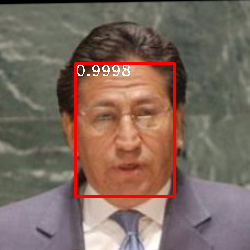

In [28]:
recog("standard_dataset/LFW_dataset/Alejandro_Toledo/Alejandro_Toledo_0001.jpg")